In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center> TD - Tri par sélection et par insertion</span>

## 1. Implémentation des tris

### 1.1 Tri par sélection

**Fonction** tri_selection (tab)
> *tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien).*  
>
> *float* : mini  *# La valeur minimale trouvée*  
> *int* : i_mini *# L'indice de la valeur minimale trouvée*  
> n $\leftarrow$ taille(tab)  
> *# i correspond au premier indice du tableau restant à trier, quand i=n-2 le tableau à trier correspond aux 2 derniers éléments de tab*  
> **Pour** i allant de 0 à n-2 **faire**   
>> i_mini $\leftarrow$ i  *# On initialise avec le premier indice du tableau à trier.*  
>> mini $\leftarrow$ tab[i]  *# On initialise avec la première valeur du tableau à trier.*  
>> **Pour** j allant de i+1 à n-1 **faire**  *# On parcourt le reste du tableau à trier.*
>>> **Si** tab[j] < mini **alors**  *# Si on trouve une valeur plus petite on met à jour i_mini et mini.*  
>>>> i_mini $\leftarrow$ j  
>>>> mini $\leftarrow$ tab[j]  
>>
>> **Permuter** tab[i] et tab[i_mini]  *# On permute la première valeur du tableau non-trié avec le minimum trouvé*

**Q1. A partir du pseudo-code ci-dessus, implémenter l'algorithme de tri par sélection en Python.**

In [10]:
#Question 1
def tri_selection(tab):
    """tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien)."""
    n=len(tab)
    compt=0
    tabCopy=list(tab) #à commenter pour un tri en place
    #tabCopy=tab # à décommenter pour un tri en place
    for i in range(n-1):
        i_mini=i
        mini=tabCopy[i]
        for j in range(i+1,n):
            if tabCopy[j]<mini :
                i_mini=j
                mini=tabCopy[j]
            compt=compt+1
            #print(compt)
        tabCopy[i],tabCopy[i_mini]=tabCopy[i_mini],tabCopy[i]
    return [tabCopy,compt] # à commenter pour un tri en place

### 1.2 Tri par insertion

**Fonction** tri_insertion (tab)
> *tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien).*  
>
> n $\leftarrow$ taille(tab)  
> *# i correspond au dernier indice du tableau déjà trié, quand i=n-2 il ne reste plus qu'à insérer au bon endroit le dernier élément du tableau, c'est donc bien la dernière itération.*  
> **Pour** i allant de 0 à n-2 **faire**   
>> j $\leftarrow$ i+1  *# j est l'indice de la valeur à insérer dans le tableau déjà trié.*  
>> **Tant que** j >0 **et** tab[j]<tab[j-1] **faire**  *# L'indice j de la valeur à insérer est décrémentée tant qu'on est pas au début du tableau et qu'on a pas trouvé une valeur supérieure à sa gauche.*
>>> **Permuter** tab[j] et tab[j-1]  *# On permute la valeur à insérer avec celle qui est à sa gauche.*  
>>> j $\leftarrow$ j-1  *# On décrémente j puisque la valeur à insérer est décalée d'un cran vers la gauche.*

**Q2. A partir du pseudo-code ci-dessus, implémenter l'algorithme de tri par insertion en Python.**

In [11]:
# Question 2
def tri_insertion(tab):
    """tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien)."""
    n=len(tab)
    compt=0
    tabCopy=list(tab) #à commenter pour un tri en place
    #tabCopy=tab # à décommenter pour un tri en place
    for i in range (n-1):
        j=i+1
        while j>0 and tabCopy[j]<tabCopy[j-1]:
            tabCopy[j],tabCopy[j-1]=tabCopy[j-1],tabCopy[j]
            j=j-1
            compt=compt+1
            #print(compt)
    return [tabCopy,compt] # à commenter pour un tri en place

### 1.3 Test des tris

**Utiliser le code ci-dessous pour tester vos algorithmes de tri sur une liste d'entiers aléatoires.** On pourra faire varier la taille $N$ de la liste et les bornes inférieures et supérieures `valMin` et `valMax` des valeurs aléatoires et on utlisera **les 2 algorithmes de tri** précédents. Dans tous les cas, **on vérifiera juste que les liste affichées après le tri sont bien triées par ordre croissant**.

In [5]:
from random import randint
#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=10
valMin=0
valMax=10
L = [randint(valMin,valMax) for i in range(N)]

#Affichage de la liste aléatoire et du résultat du tri
print('Liste de départ :',L)
tri_selection(L)
#tri_insertion(L) #Décommenter cette ligne et commenter la ligne du dessus pour tester
print('Liste triée :',L)

Liste de départ : [0, 1, 4, 3, 5, 7, 7, 4, 10, 0]
Liste triée : [0, 1, 4, 3, 5, 7, 7, 4, 10, 0]


Le fait de trier les liste **en place** risque de compliquer un peu les tests. En effet, si je lance les deux tris à la suite sur la même liste, le deuxième tri s'effectuera sur une liste déjà triée. Je ne pourrai donc **pas comparer les deux algorithmes**.

**Q3. Modifier vos fonctions `tri_selection(tab)` et `tri_insertion(tab)` afin qu'elles retournent la liste triée, sans modifier la liste passée en argument, puis tester les algorithmes modifiés avec le code à compléter ci-dessous.**

In [13]:
# Question 3
from random import randint
#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=10
valMin=0
valMax=10
L = [randint(valMin,valMax) for i in range(N)]

#Affichage de la liste aléatoire et du résultat du tri
print('Liste de départ :', L)
L1=tri_selection(L)
L2=tri_insertion(L)
print('Liste triée par sélection :', L1[0], "Nombre d'itérations ", L1[1]) #Ligne à compléter
print('Liste triée par insertion :', L2[0], "Nombre d'itérations ", L2[1]) #Ligne à compléter

Liste de départ : [3, 2, 8, 2, 10, 0, 5, 0, 5, 9]
Liste triée par sélection : [0, 0, 2, 2, 3, 5, 5, 8, 9, 10] Nombre d'itérations  45
Liste triée par insertion : [0, 0, 2, 2, 3, 5, 5, 8, 9, 10] Nombre d'itérations  19


## 2. Mesures de complexité

### 2.1 Comparaison des algorithmes

On utilise la commande `timeit` pour comparer le temps d'exécution des tris pas insertion et par sélection, ainsi que le tri intégré dans Python (fonction `sorted`) qui est basée sur l'algorithme *timsort* (association du tri fusion et du tri par insertion). En moyenne, le tri par insertion devrait être environ 2 fois plus rapide que le tri par sélection.

In [7]:
from timeit import Timer

#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=1000
valMin=0
valMax=N
L = [randint(valMin,valMax) for i in range(N)]

print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

Durée d'exécution pour le tri par sélection :
36.8 ms ± 4.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour tri par insertion :
90 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour timsort :
120 µs ± 8.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### 2.2 Pire et meilleur des cas

Le tri par sélection fonctionne de la même façon quelle que soit la liste fournie en entrée. Par contre, nous avons vu que que **le fonctionnement du tri par insertion pouvait varier selon les cas**. La comparaison précédente donne-t-elle le même résultat dans le pire et le meilleur cas pour le tri par insertion ?

**Q4. Modifier le programme précédent pour renouveler la comparaison dans le pire et le meilleur des cas pour l'agorithme de tri par insertion.**

In [8]:
# Question 4
N=1000
#Création d'une Liste de N entiers dans le pire des cas
L = sorted([randint(0,N) for i in range(N)], reverse=True) #liste triée par ordre décroissant

print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

#Création d'une Liste de N entiers dans le meilleur des cas
L = sorted([randint(0,N) for i in range(N)])#liste déjà triée

print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

Durée d'exécution pour le tri par sélection :
33.9 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour tri par insertion :
121 ms ± 5.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour timsort :
37.2 µs ± 795 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Durée d'exécution pour le tri par sélection :
26.8 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour tri par insertion :
176 µs ± 24.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Durée d'exécution pour timsort :
9.89 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 2.3 Vérification de la complexité

On veut vérifier que la **complexité moyenne des algorithmes de tri par sélection et insertion sont quadratiques** et la comparer à celle du tri intégré dans Python.

Le code ci-dessous permet de tracer les **courbes donnant le temps d'exécution des 3 algorithmes de tri en fonction de la taille n du tableau à trier**. Une courbe de modélisation quadratique est ajoutée pour les tris par sélection et insertion.

N =  1000
N =  2000
N =  3000
N =  4000
N =  5000
N =  6000
N =  7000
N =  8000
N =  9000
N =  10000
Modele 1 : y = 5.00E-01*x²
Modele 2 : y = 2.51E-01*x²


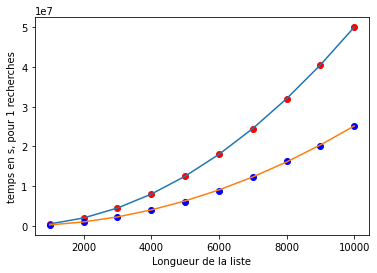

In [19]:
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

def quadratique (x,a): # fonction quadratique de la forme y=f(a*x²)
    return a*x*x

# Faire une boucle sur les valeurs de n pour calculer les temps d'exécution sur chacun des 2 algorithme
# La liste abscisse contiendra les valeurs de n, les listes ordonnee1, ordonnee2 et ordonnee3 contiendront les temps
# d'exécution des 3 algorihtmes. 
abscisse=[]
ordonnee1=[]
ordonnee2=[]
ordonnee3=[]
modele1=[]
modele2=[]

Nbessai=1
Nbrepet=1
inc=1000
debut=1000
fin=11000
for N in range(debut,fin,inc): # la taille N du tableau varie de debut à fin par pas de inc
    print('N = ',N)
    abscisse.append(N) # N sera en abscisse
    nbiter1=0
    nbiter2=0
    for i in range(Nbrepet):
#        L=sorted([randint(0,N) for k in range(N)]) # meilleur cas
#        L=sorted([randint(0,N) for k in range(N)], reverse=True) # pire cas
        L=[randint(0,N) for k in range(N)] # cas moyen
        L1=tri_selection(L)
        nbiter1=nbiter1+L1[1]
        L2=tri_insertion(L)
        nbiter2=nbiter2+L2[1]
    ordonnee1.append(nbiter1/Nbrepet)
    ordonnee2.append(nbiter2/Nbrepet)
 
#    t1 = Timer("tri_selection(L)", globals=globals()) # on crée un timer pour tri_selection
#    ordonnee1.append(min(t1.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 1 le temps minimum sur Nbessai essais de Nbrepet recherches
#    t2 = Timer("tri_insertion(L)", globals=globals()) # on crée un timer pour tri_insertion
#    ordonnee2.append(min(t2.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 2 le temps minimum sur Nbessai essais de Nbrepet recherches
#    t3 = Timer("sorted(L)", globals=globals()) # on crée un timer pour sorted
#    ordonnee3.append(min(t3.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 2 le temps minimum sur Nbessai essais de Nbrepet recherches

#calcul des paramètres de modélisation pour ordonnee1 et ordonnee2
parametres1, covariance = curve_fit(quadratique, abscisse, ordonnee1) 
parametres2, covariance = curve_fit(quadratique, abscisse, ordonnee2)

for i in range(len(abscisse)) : #construction des ordonnées pour les 2 modèles
    modele1.append(quadratique(abscisse[i],*parametres1))
    modele2.append(quadratique(abscisse[i],*parametres2))
    
# courbes pour les modèles avec légende    
plt.plot(abscisse,modele1)
plt.plot(abscisse,modele2)
print('Modele 1 : y = {:.2E}*x²'.format(*parametres1))
print('Modele 2 : y = {:.2E}*x²'.format(*parametres2))

# nom des axes    
plt.xlabel('Longueur de la liste')
plt.ylabel('temps en s, pour {} recherches'.format(Nbessai))
# definition des courbes
plt.scatter(abscisse,ordonnee1,color='red')
plt.scatter(abscisse,ordonnee2,color='blue')
#plt.scatter(abscisse,ordonnee3,color='green')
#tracé du graphique
plt.show()

## 3. Preuve de la correction

### 3.1 Tri par sélection

**L'invariant de boucle** est : "A la fin de l'itération $i$, les $i+1$ premiers éléments du tableau sont triés par ordre croissant et le reste du tableau (non trié) ne contient que des valeurs supérieures ou égales à celles déjà triées".

**Q.5 Montrer que cette propriété est vraie pour $i=0$, puis, que si elle est vraie pour $i=k$ alors elle est encore vraie pour $i=k+1$.**

**Réponse :**

*A compléter ...*

Pour $i=0$, la propriété s'écrit : "A la fin de l'itération $0$, le premier élément du tableau est trié et le reste du tableau ne contient que des valeurs supérieures ou égales à cette valeur". Comme à la fin de la première itération le premier élément du tableau est la valeur minimum de l'ensemble du tableau, la propriété est vraie.

On suppose que la propriété est vraie à la fin de l'itération $i=k$. Les $k+1$ premiers éléments du tableau sont donc triés par ordre croissant et le reste du tableau ne contient que des valeurs supérieures ou égales à la dernière valeur triée.

A la fin de l'itération suivante, on a permuté la valeur minimum du tableau non-trié avec l'élément d'indice $k+1$, c'est-à-dire le $k+2^{ème}$ élément, ou encore la première valeur du tableau non-trié. Or, on sait par hypothèse que ce nouvel élément d'indice $k+1$ est forcément supérieur aux $k+1$ premiers éléments déjà triés. Ce sont donc maintenant les $k+2$ premiers éléments qui sont triés.

Quand au reste du tableau, il contient forcément des valeurs supérieures ou égales au dernier élément trié puisque c'était un minimum.

Après une itération, la propriété est donc encore vraie pour $i=k+1$.

### 3.2 Tri par insertion

**L'invariant de boucle** est : "A la fin de l'itération $i$, les $i+2$ premiers éléments du tableau sont triés par ordre croissant".

**Q6. Montrer que cette propriété est vraie pour $i=0$, puis, que si elle est vraie pour $i=k$ alors elle est encore vraie pour $i=k+1$.**

**Réponse :** 

*A compléter ...*

Pour $i=0$, la propriété devient : "A la fin de l'itération $0$, les 2 premiers éléments sont triés par ordre croissant". Or, à la fin de la première itération, on a permuté les 2 premières valeurs si la deuxième était plus petite que la première. Sinon, on a rien changé. Dans tous les cas, les 2 premières valeurs sont bien triées par ordre croissante et la propriété est vraie.

Supposons maintenant que la propriété est vraie à la fin de l'itération $i=k$. Alors on peut dire qu'à la fin de cette itération les $k+2$ premiers éléments du tableau sont triés par ordre croissant.

Lors de l'itération suivante, on permute le $k+3^{ème}$ élément avec l'élément qui est à sa gauche, jusqu'à ce que dernier soit plus petit que lui. A la fin de cette itération, ce sont donc bien les $k+3$ premiers éléments du tableau qui sont triés par ordre croissant. La propriété est donc vraie pour $i=k+1$.
